## Зачетная задача. Вариант 14.


# Интерполяция. Длина тормозного пути


Цель работы: вычислить максимальную скорость автомобиля, чтобы длина тормозного пути не превосходила бы  60 путем кусочной линейной интерполяции,кусочной кубической интерполяции, обратной кубической интерполяциии.

Начальные данные: таблица длины тормозного пути некоторого автомобиля в зависимости от его скорости   в начале пути:  
```
  v      d
  0      0
 10      5
 20     20
 30     46
 40     70
 50    102
 60    153
```



Под словом интерполяция в математике понимают процесс нахождени значений какой-либо функции в некоторой точке по ее значениям в других точках. Cуществуют различные методы интерполяции, рассмотрим некоторые из них

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Представим начальные данные следуюшим образом:

In [8]:
v = np.array([0,  10,  20,  30,  40,  50, 60])
d = np.array([0, 5., 20,  46, 70, 102, 153])

Построим график кусочно-линейной функции и найдем максимально возможную скорость

In [25]:
h = interpolate.interp1d(d, v, kind = 'linear')
h(60)

array(35.83333333)

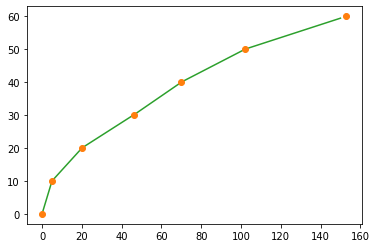

In [27]:
dd = np.linspace(0, 150, 500)
vv = h(dd)
plt.plot(dd, vv, color = 'tab:green')
plt.plot(d, v, 'or', color = 'tab:orange')
pass

Построим график для кусочно-кубической интерполяции 

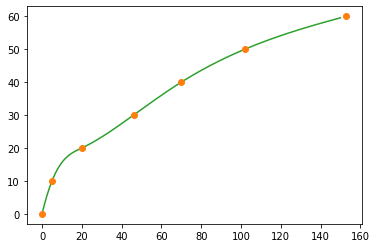

In [28]:
f = interpolate.interp1d(d, v, kind = 'cubic')
dd = np.linspace(0, 150, 500)
vv = f(dd)
plt.plot(dd, vv, color = 'tab:green')
plt.plot(d, v, 'or', color = 'tab:orange')
pass


Вычислим его значение в требуемой точке

In [11]:
f(60)

array(36.00342639)

То есть, методом кубической интрерполяции мы выяснили, что для выполнения условия скорость должна быть меньше 36.00342639

Найдем для нашей функции интерполяционный многочлен и вычислим с его помощью искомое значение

In [12]:
f = np.polyfit(d, v, 6)
f

array([-9.09170761e-10,  3.71982217e-07, -5.69439974e-05,  4.10077119e-03,
       -1.43048892e-01,  2.61961353e+00, -3.09381017e-12])

In [13]:
np.polyval(f, 60)

36.808273514842234

С помощью интерполяционного многочлена, мы получили большее возможное значение скорости: 36.808273514842234 

График интерполяционного многочлена

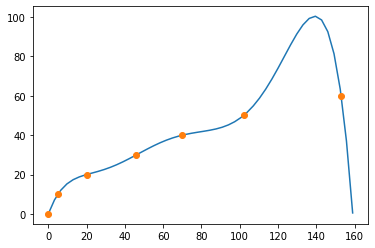

In [14]:
dd = np.linspace(0, 159, 50)
plt.plot(dd, np.polyval(f, dd))
plt.plot(d, v, 'o')
pass

Наблюдаем сильный скачек на одном из промежутков, далекий от истины

Найдем требуемую величину с помощью обратной кубической интерполяции

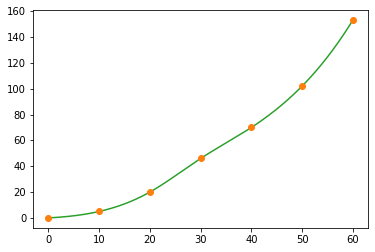

In [29]:
u= interpolate.interp1d(v, d, kind = 'cubic')
vv = np.linspace(0, 60, 500)
dd = u(vv)
plt.plot(vv, dd, color = 'tab:green')
plt.plot(v, d, 'or', color = 'tab:orange')
pass

Сравним результаты прямой и обратной кубической интерполяции

In [19]:
u(36.00342639)

array(60.32398532)

Получаем результат примерно на 0.3 больше требуемого

Подставим результат, полученный интерполяционным многочленом

In [20]:
u(36.808273514842234)

array(62.20781598)

Разница заметно больше, на целых 2 единицы скорости

## Выводы:
1. Пользуясь различными методами интерполяции, получаем не идентичные значения
2. Интерполяционный многочлен удобен в применении,
но при высоком значении степени некоторые точки осциллируют, тем самым понижая точность
3. Наиболее точным показал себя метод кубической интерполяции.
Он наиболее плавен и близок к реальным значениям начальных данных